## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

from functools import reduce

pd.options.mode.chained_assignment = None

## Load the Data

In [3]:
df15 = pd.read_csv('players_15.csv')
df16 = pd.read_csv('players_16.csv')
df17 = pd.read_csv('players_17.csv')
df18 = pd.read_csv('players_18.csv')
df19 = pd.read_csv('players_19.csv')
df20 = pd.read_csv('players_20.csv')
teams_leagues = pd.read_csv('teams_and_leagues.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Initial Check

In [4]:
display(df15.shape)
display(df16.shape)
display(df17.shape)
display(df18.shape)
display(df19.shape)
display(df20.shape)
display(teams_leagues.shape)

(15465, 104)

(14881, 104)

(17009, 104)

(17592, 104)

(17770, 104)

(18278, 104)

(1080, 2)

In [5]:
df20.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [6]:
df20.dtypes

sofifa_id                       int64
player_url                     object
short_name                     object
long_name                      object
age                             int64
dob                            object
height_cm                       int64
weight_kg                       int64
nationality                    object
club                           object
overall                         int64
potential                       int64
value_eur                       int64
wage_eur                        int64
player_positions               object
preferred_foot                 object
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
work_rate                      object
body_type                      object
real_face                      object
release_clause_eur            float64
player_tags                    object
team_position                  object
team_jersey_number            float64
loaned_from 

In [7]:
df20.isnull().sum()

sofifa_id                         0
player_url                        0
short_name                        0
long_name                         0
age                               0
dob                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1298
player_tags                   16779
team_position                   240
team_jersey_number              240
loaned_from                   17230
joined                      

## Data Cleaning: Clean up the players characteristics columns

In [8]:
df20['ls'] = df20['ls'].str[:2]
df20['st'] = df20['st'].str[:2]
df20['rs'] = df20['rs'].str[:2]
df20['lw'] = df20['lw'].str[:2]
df20['lf'] = df20['lf'].str[:2]
df20['cf'] = df20['cf'].str[:2]
df20['rf'] = df20['rf'].str[:2]
df20['rw'] = df20['rw'].str[:2]
df20['lam'] = df20['lam'].str[:2]
df20['cam'] = df20['cam'].str[:2]
df20['ram'] = df20['ram'].str[:2]
df20['lm'] = df20['lm'].str[:2]
df20['lcm'] = df20['lcm'].str[:2]
df20['cm'] = df20['cm'].str[:2]
df20['rcm'] = df20['rcm'].str[:2]
df20['rm'] = df20['rm'].str[:2]
df20['lwb'] = df20['lwb'].str[:2]
df20['ldm'] = df20['ldm'].str[:2]
df20['cdm'] = df20['cdm'].str[:2]
df20['rdm'] = df20['rdm'].str[:2]
df20['rwb'] = df20['rwb'].str[:2]
df20['lb'] = df20['lb'].str[:2]
df20['lcb'] = df20['lcb'].str[:2]
df20['cb'] = df20['cb'].str[:2]
df20['rcb'] = df20['rcb'].str[:2]
df20['rb'] = df20['rb'].str[:2]

## Data Cleaning: Drop Missing Values

In [9]:
df20.drop(['player_tags', 'loaned_from', 'nation_position', 'nation_jersey_number', 'gk_diving', 
                      'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits'], axis=1, inplace=True)

In [10]:
df20.dropna(inplace=True)

In [11]:
df20.isnull().sum().sum()

0

## Feature Engineering: Binarize 'preferred_foot' column

In [12]:
df20['preferred_foot'].value_counts()

Right    11291
Left      3786
Name: preferred_foot, dtype: int64

In [13]:
df20['preferred_foot'] = df20['preferred_foot'].map({'Right': 1, 'Left': 0})

## Feature Engineering:  Create dummies

In [14]:
df20['work_rate'].value_counts()

Medium/Medium    7292
High/Medium      2975
Medium/High      1618
High/High         932
Medium/Low        807
High/Low          609
Low/Medium        428
Low/High          386
Low/Low            30
Name: work_rate, dtype: int64

In [15]:
df20_dummy = pd.get_dummies(df20['work_rate'])
#df20 = df20.drop('work_rate',axis = 1)
df20 = df20.join(df20_dummy)

In [16]:
df20.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,team_jersey_number,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,High/High,High/Low,High/Medium,Low/High,Low/Low,Low/Medium,Medium/High,Medium/Low,Medium/Medium
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",0,5,4,4,Medium/Low,Messi,Yes,195800000.0,RW,10.0,2004-07-01,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63,0,0,0,0,0,0,0,1,0
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",1,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,LW,7.0,2018-07-10,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,0,1,0,0,0,0,0,0,0
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",1,5,5,5,High/Medium,Neymar,Yes,195200000.0,CAM,10.0,2017-08-03,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61,0,0,1,0,0,0,0,0,0
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",1,4,4,4,High/Medium,Normal,Yes,184500000.0,LW,7.0,2019-07-01,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83,83,83,89,88,88,88,89,89,89,89,89,83,83,83,89,66,63,63,63,66,61,49,49,49,61,0,0,1,0,0,0,0,0,0
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,91,91,90000000,370000,"CAM, CM",1,4,5,4,High/High,Normal,Yes,166500000.0,RCM,17.0,2015-08-30,2023.0,76.0,86.0,92.0,86.0,61.0,78.0,93,82,55,92,82,86,85,83,91,91,77,76,78,91,76,91,63,89,74,90,76,61,88,94,79,91,68,58,51,15,13,5,10,13,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,1,0,0,0,0,0,0,0,0


## EDA

#### Comparing the average value by age between FIFA 2016 through 2020

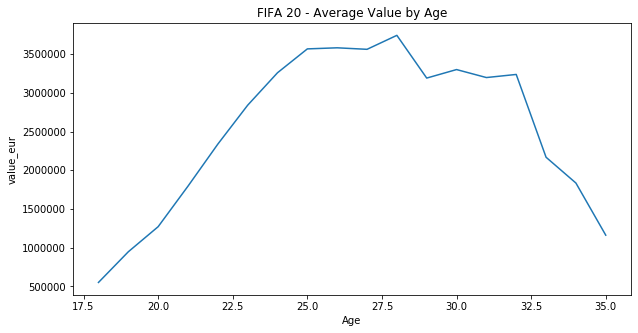

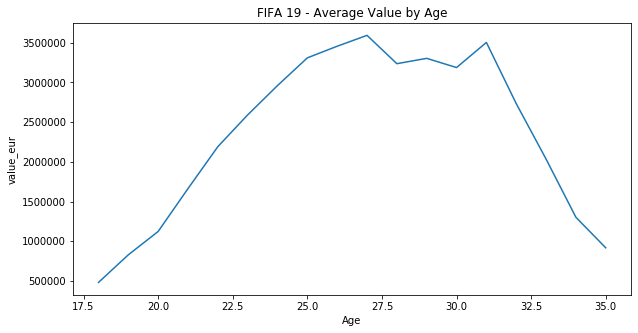

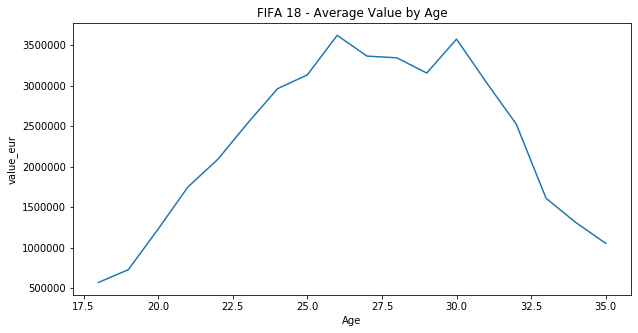

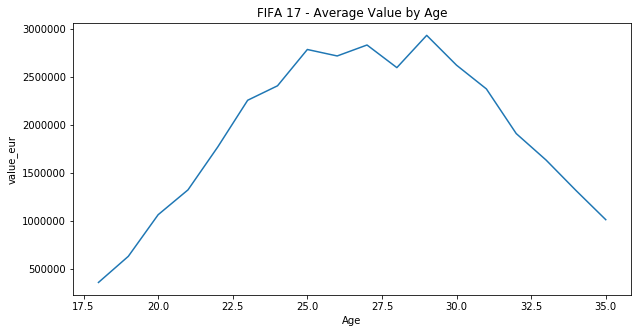

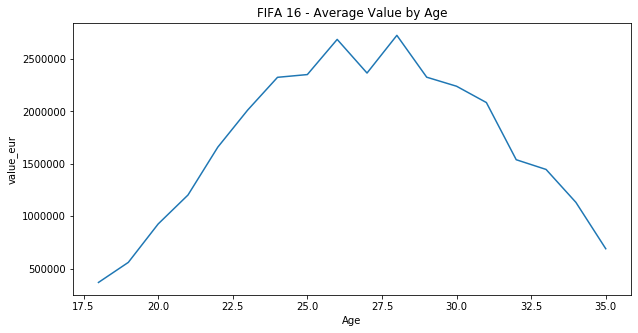

In [17]:
df20_age_value_18_35 = df20[(df20.age.astype(int) >= 18) & (df20.age.astype(int) <= 35)].groupby(['age'])['value_eur'].mean()
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax1.plot(df20_age_value_18_35)
ax1.set_ylabel('value_eur')
ax1.set_xlabel('Age')
ax1.set_title('FIFA 20 - Average Value by Age');

df19_age_value_18_35 = df19[(df19.age.astype(int) >= 18) & (df19.age.astype(int) <= 35)].groupby(['age'])['value_eur'].mean()
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax1.plot(df19_age_value_18_35)
ax1.set_ylabel('value_eur')
ax1.set_xlabel('Age')
ax1.set_title('FIFA 19 - Average Value by Age');

df18_age_value_18_35 = df18[(df18.age.astype(int) >= 18) & (df18.age.astype(int) <= 35)].groupby(['age'])['value_eur'].mean()
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax1.plot(df18_age_value_18_35)
ax1.set_ylabel('value_eur')
ax1.set_xlabel('Age')
ax1.set_title('FIFA 18 - Average Value by Age');

df17_age_value_18_35 = df17[(df17.age.astype(int) >= 18) & (df17.age.astype(int) <= 35)].groupby(['age'])['value_eur'].mean()
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax1.plot(df17_age_value_18_35)
ax1.set_ylabel('value_eur')
ax1.set_xlabel('Age')
ax1.set_title('FIFA 17 - Average Value by Age');

df16_age_value_18_35 = df16[(df16.age.astype(int) >= 18) & (df16.age.astype(int) <= 35)].groupby(['age'])['value_eur'].mean()
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax1.plot(df16_age_value_18_35)
ax1.set_ylabel('value_eur')
ax1.set_xlabel('Age')
ax1.set_title('FIFA 16 - Average Value by Age');

#### Comparing the average rating by age between FIFA 2016 through 2020

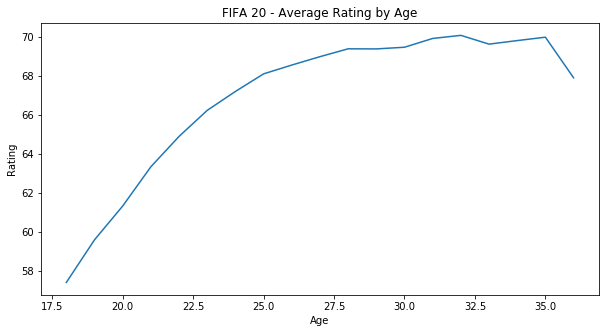

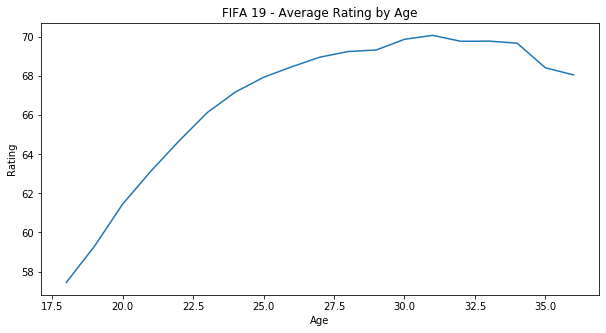

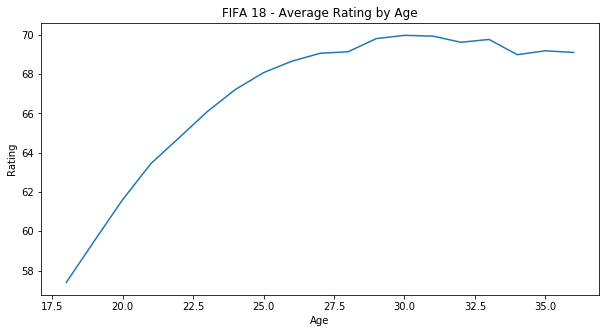

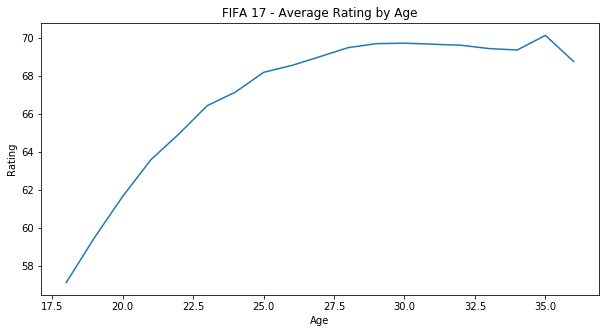

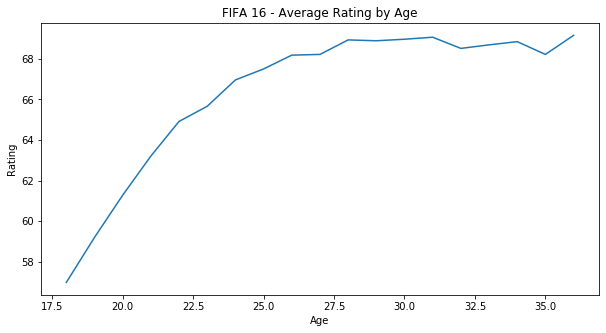

In [18]:
df20_age_overall_18_35 = df20[(df20.age.astype(int) >= 18) & (df20.age.astype(int) <= 36)].groupby(['age'])['overall'].mean()
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax1.plot(df20_age_overall_18_35)
ax1.set_ylabel('Rating')
ax1.set_xlabel('Age')
ax1.set_title('FIFA 20 - Average Rating by Age');

df19_age_overall_18_35 = df19[(df19.age.astype(int) >= 18) & (df19.age.astype(int) <= 36)].groupby(['age'])['overall'].mean()
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax1.plot(df19_age_overall_18_35)
ax1.set_ylabel('Rating')
ax1.set_xlabel('Age')
ax1.set_title('FIFA 19 - Average Rating by Age');

df18_age_overall_18_35 = df18[(df18.age.astype(int) >= 18) & (df18.age.astype(int) <= 36)].groupby(['age'])['overall'].mean()
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax1.plot(df18_age_overall_18_35)
ax1.set_ylabel('Rating')
ax1.set_xlabel('Age')
ax1.set_title('FIFA 18 - Average Rating by Age');

df17_age_overall_18_35 = df17[(df17.age.astype(int) >= 18) & (df17.age.astype(int) <= 36)].groupby(['age'])['overall'].mean()
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax1.plot(df17_age_overall_18_35)
ax1.set_ylabel('Rating')
ax1.set_xlabel('Age')
ax1.set_title('FIFA 17 - Average Rating by Age');

df16_age_overall_18_35 = df16[(df16.age.astype(int) >= 18) & (df16.age.astype(int) <= 36)].groupby(['age'])['overall'].mean()
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax1.plot(df16_age_overall_18_35)
ax1.set_ylabel('Rating')
ax1.set_xlabel('Age')
ax1.set_title('FIFA 16 - Average Rating by Age');

In [19]:
#df20_age_value = df20.groupby(['age'])['value_eur'].mean()
#fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
#ax1.plot(df20_age_value)
#ax1.set_ylabel('value_eur')
#ax1.set_xlabel('Age')
#ax1.set_title('FIFA 20 - Average Value by Age')

In [20]:
#df20_age_overall = df20.groupby(['age'])['overall'].mean()
#fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
#ax1.plot(df20_age_overall)
#ax1.set_ylabel('Rating')
#ax1.set_xlabel('Age')
#ax1.set_title('FIFA 20 - Average Rating by Age')

#### Comparing the average value by team position between FIFA 2016 through 2020 using barplot

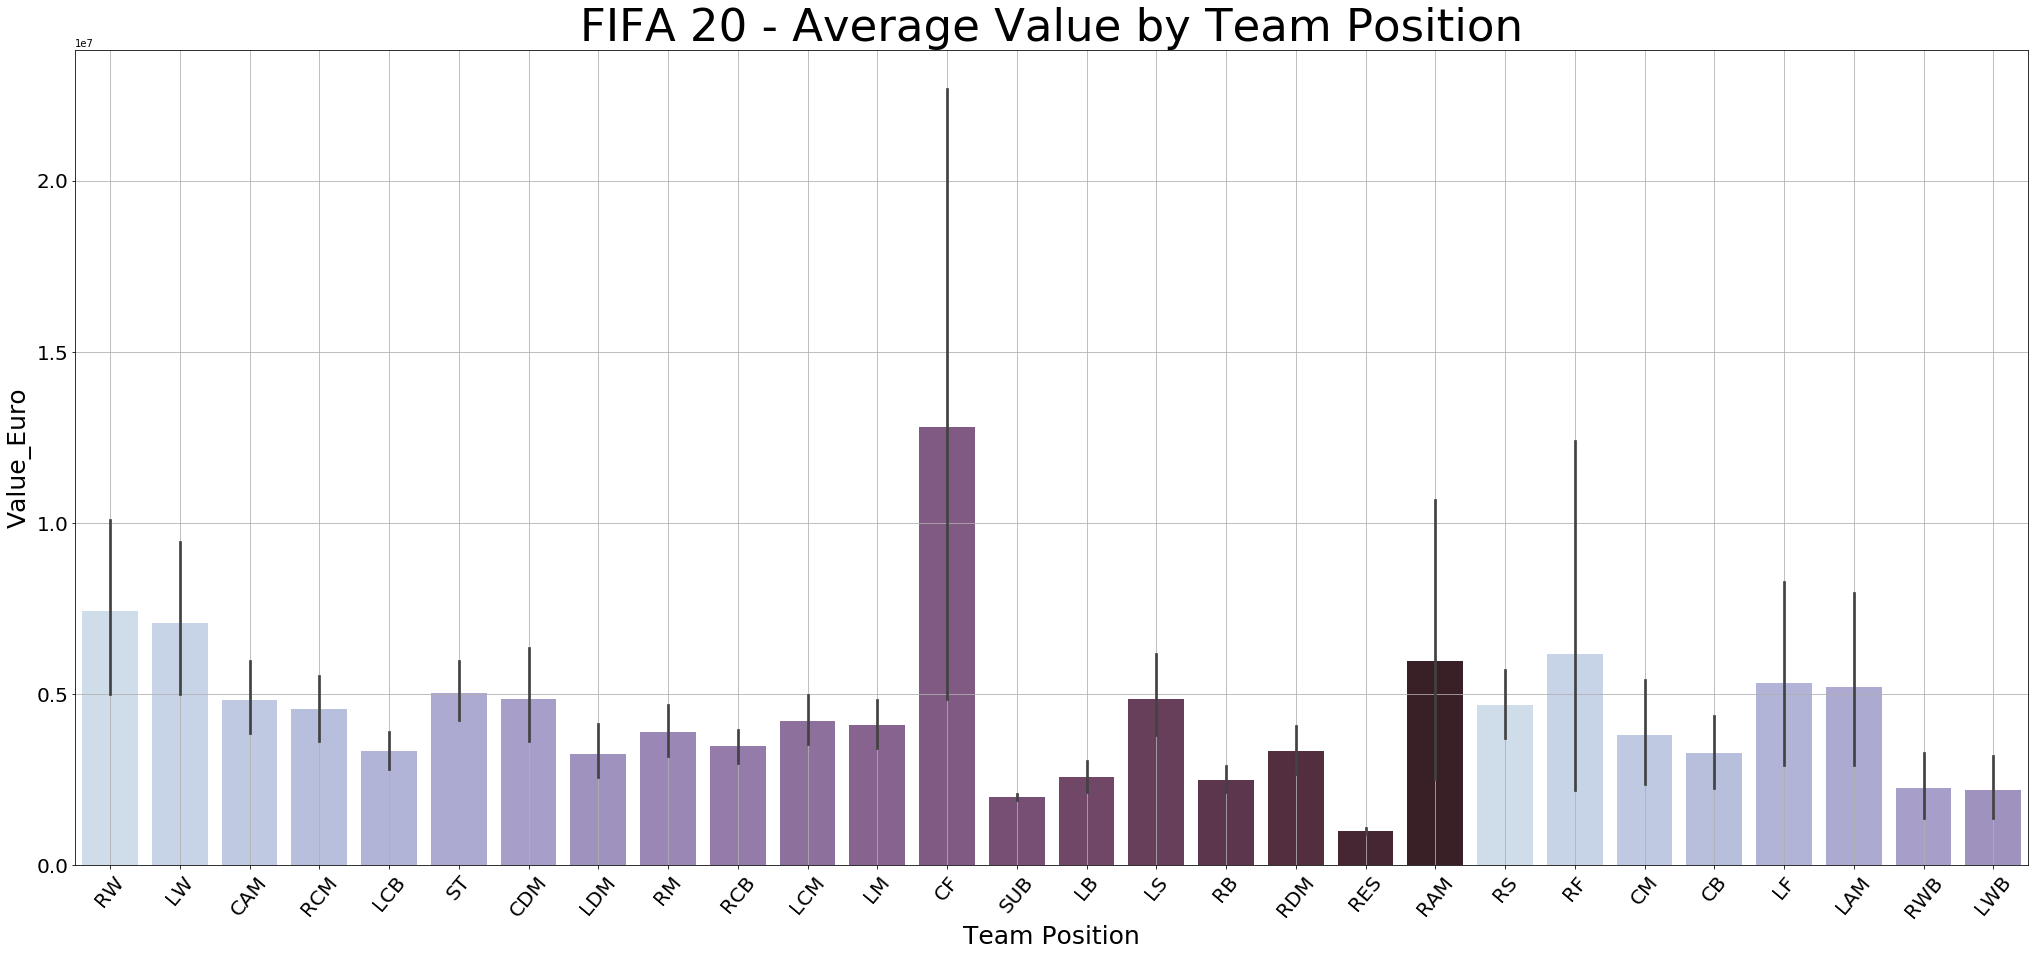

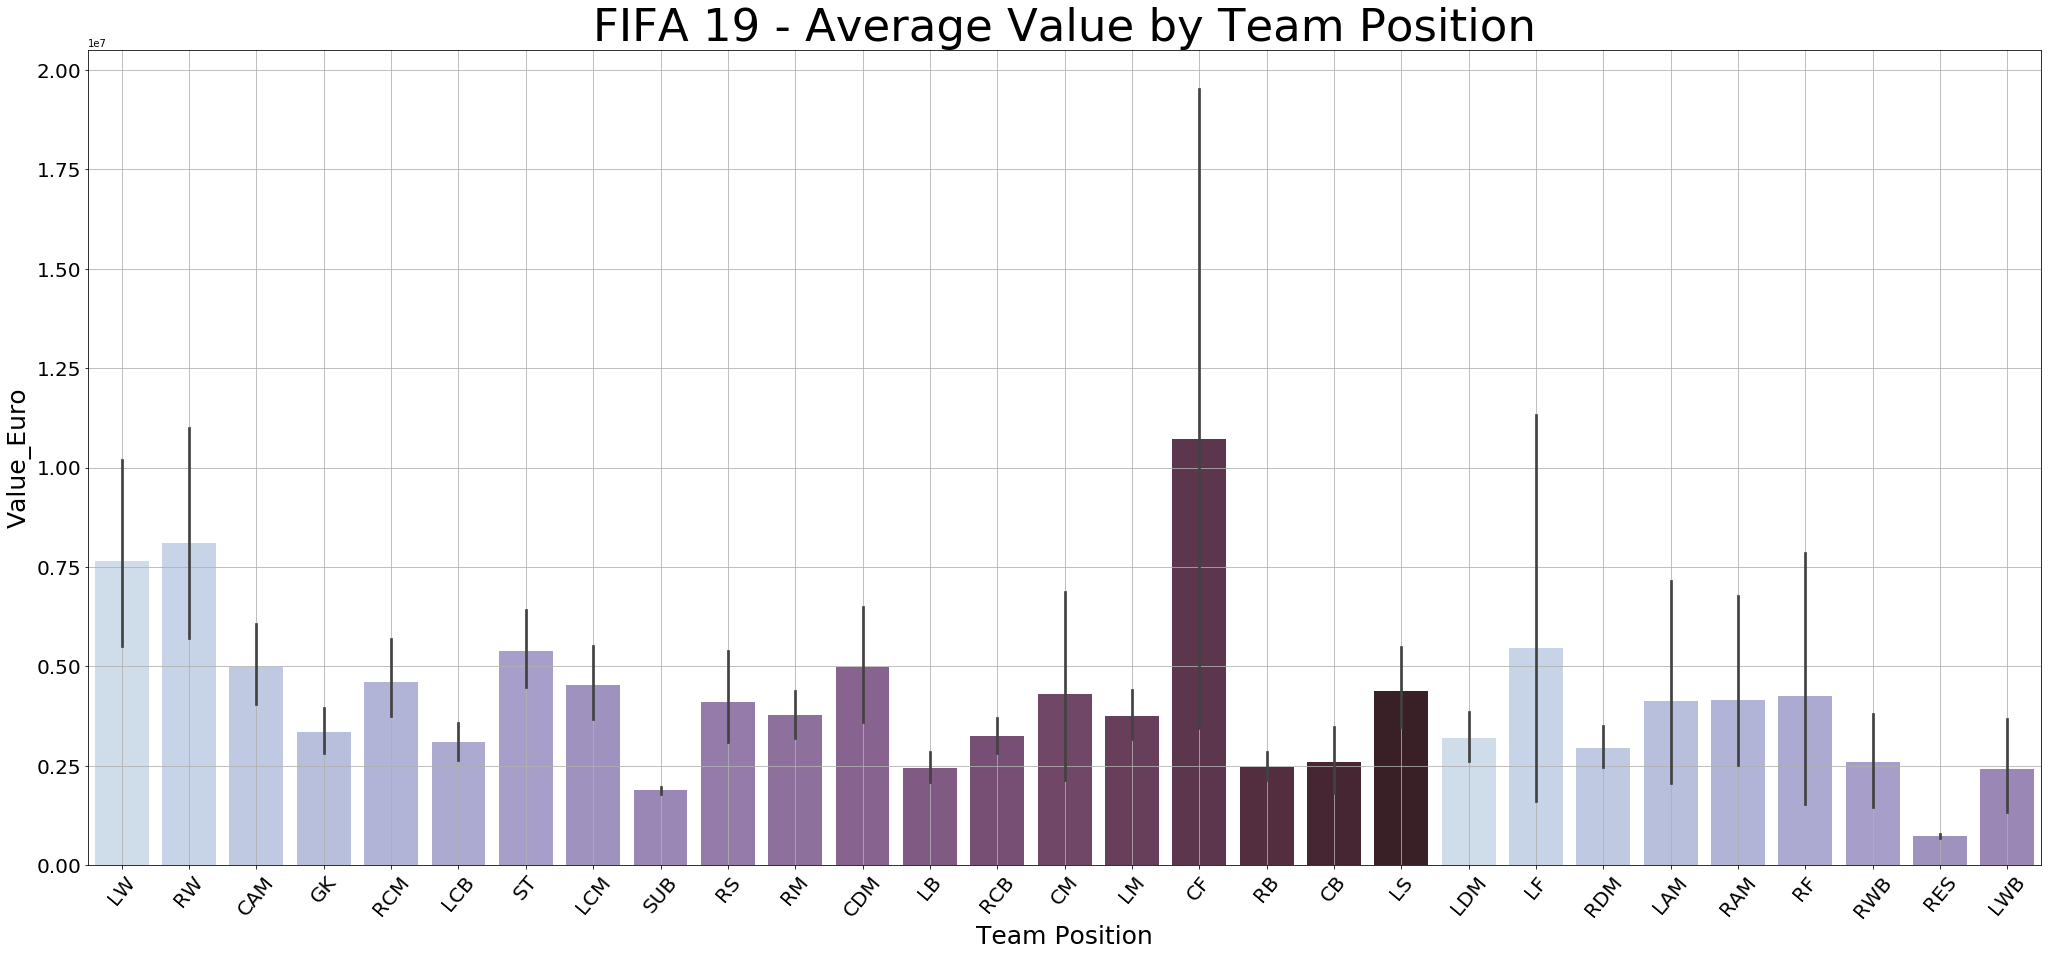

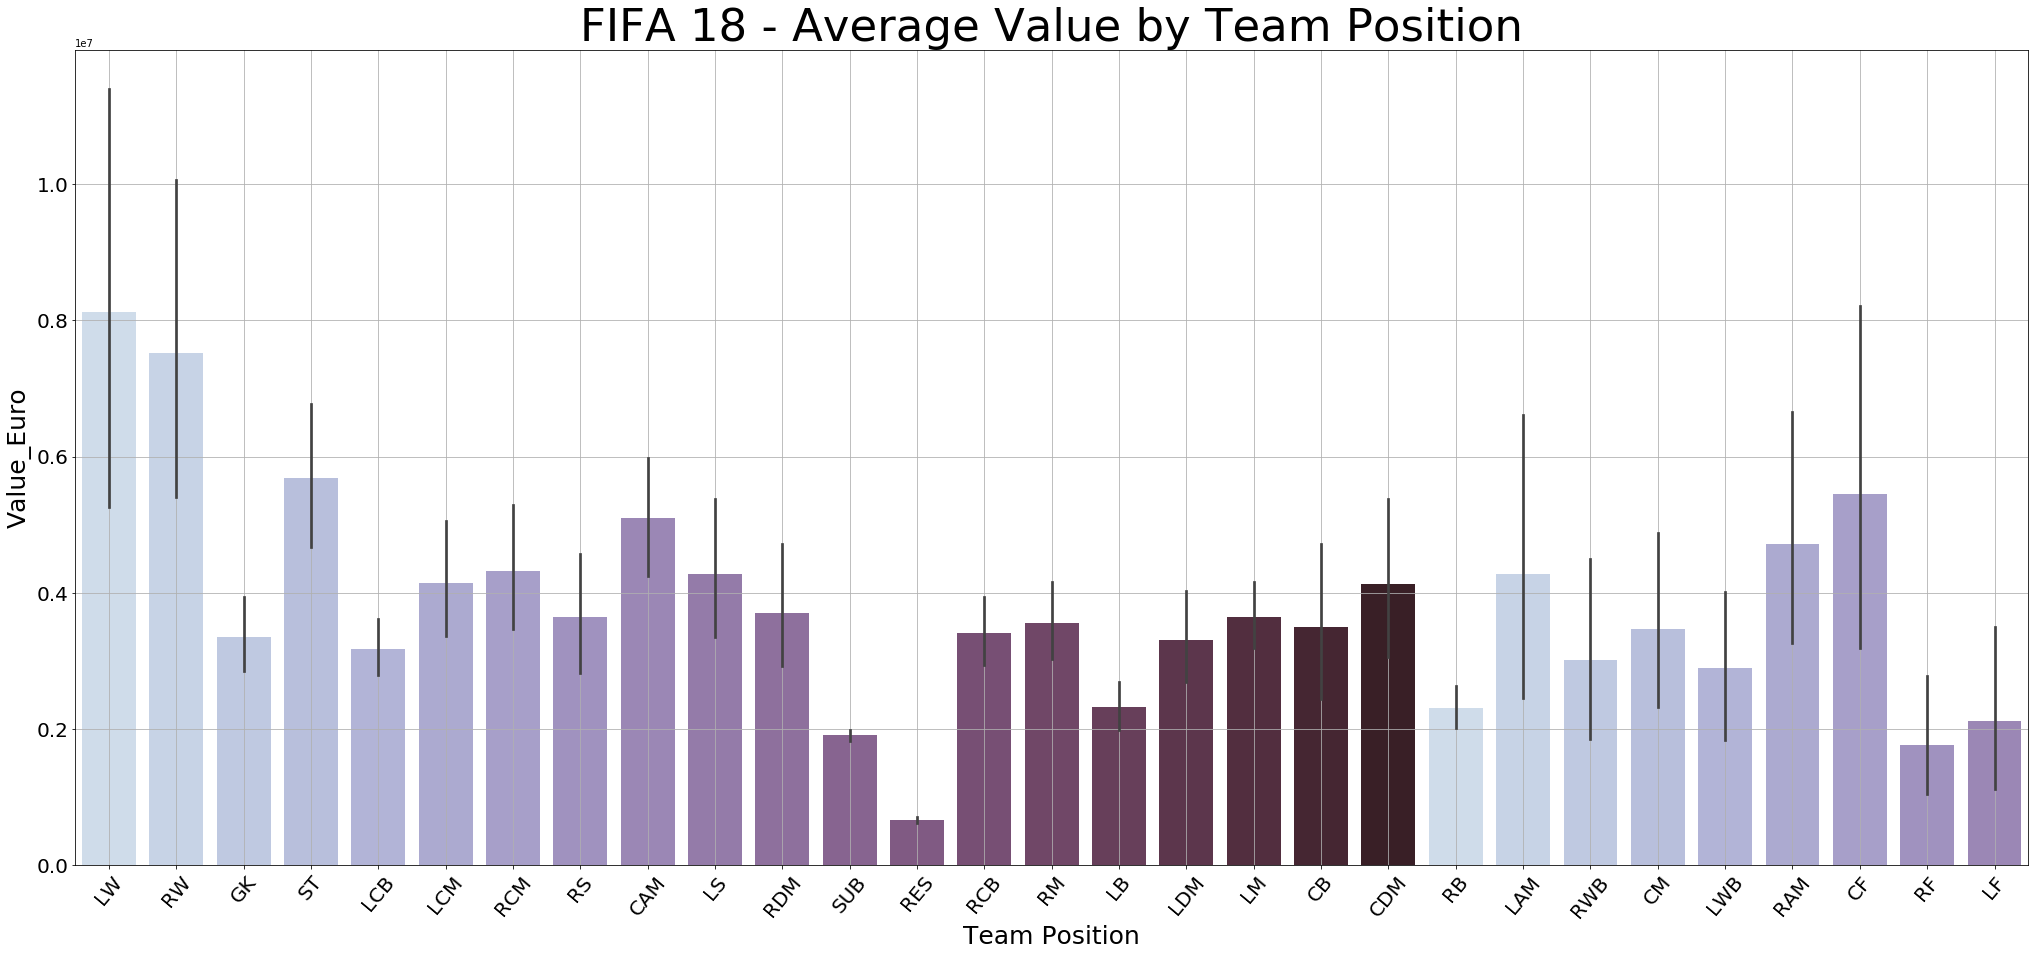

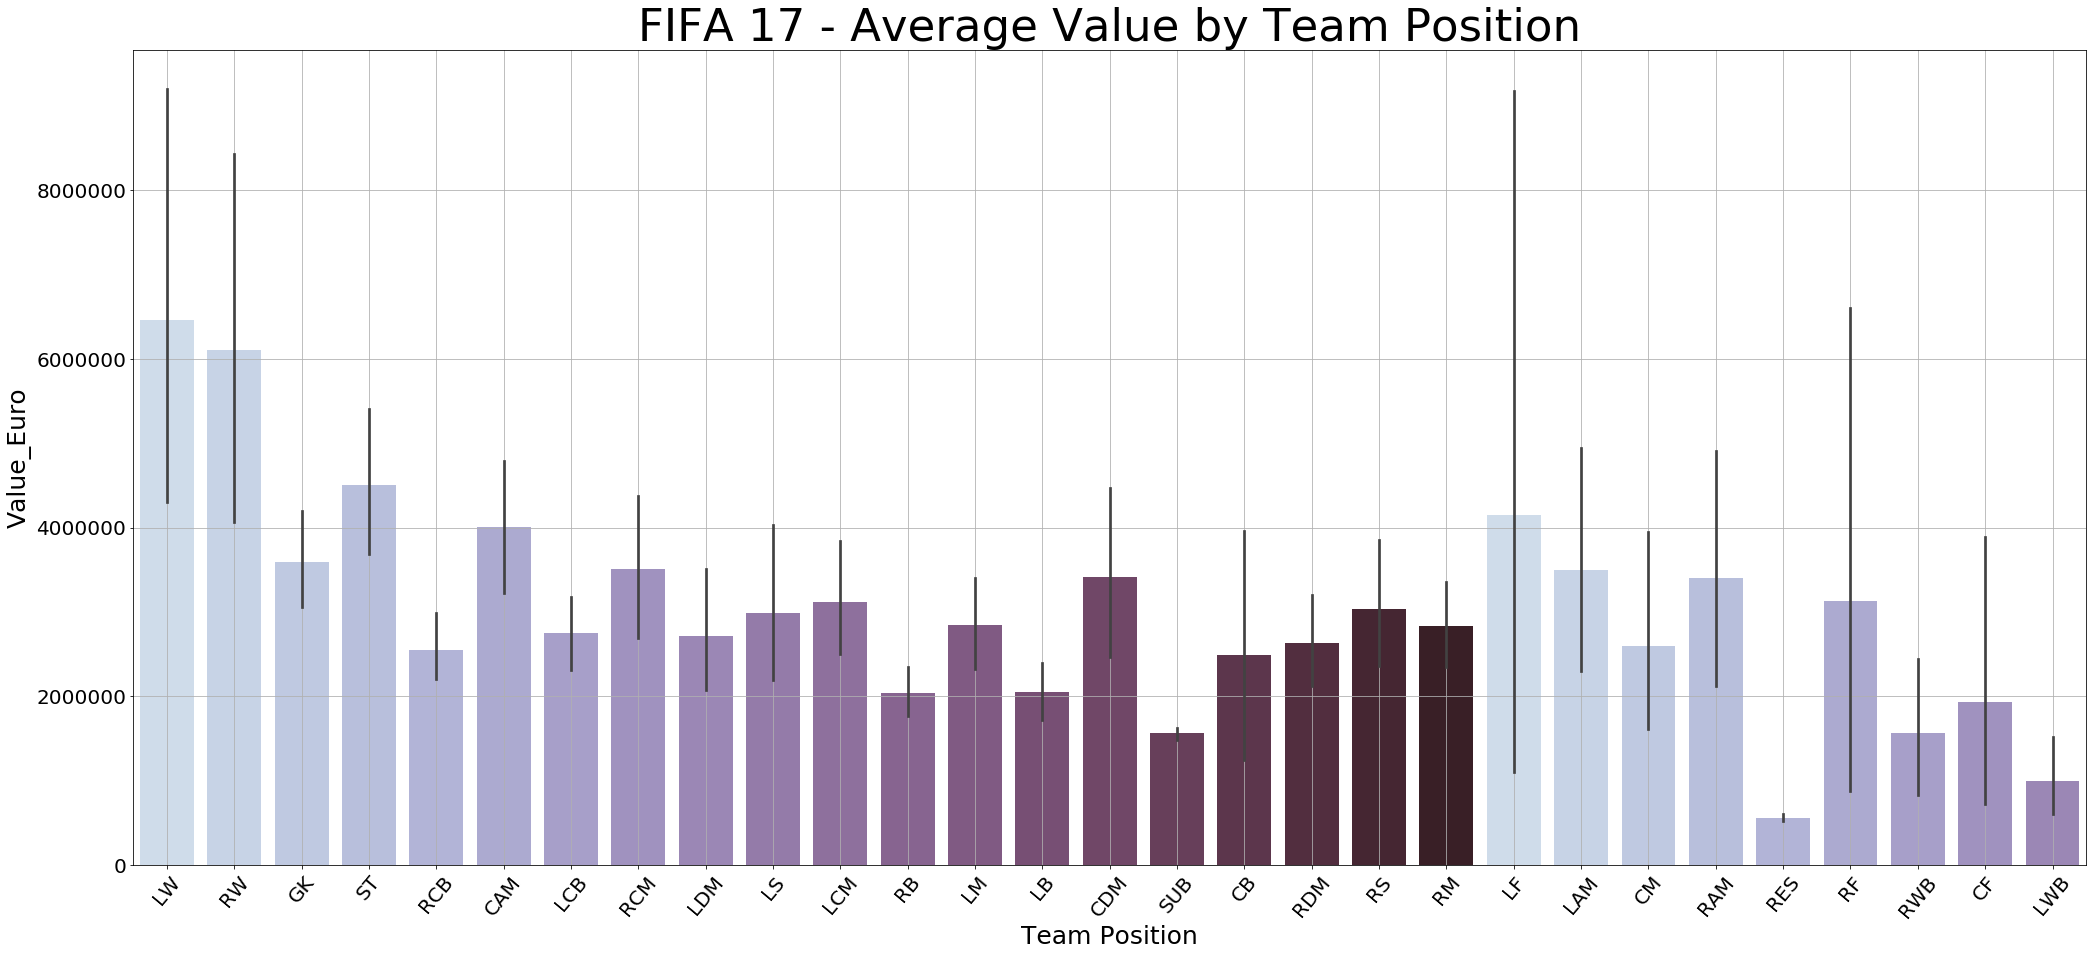

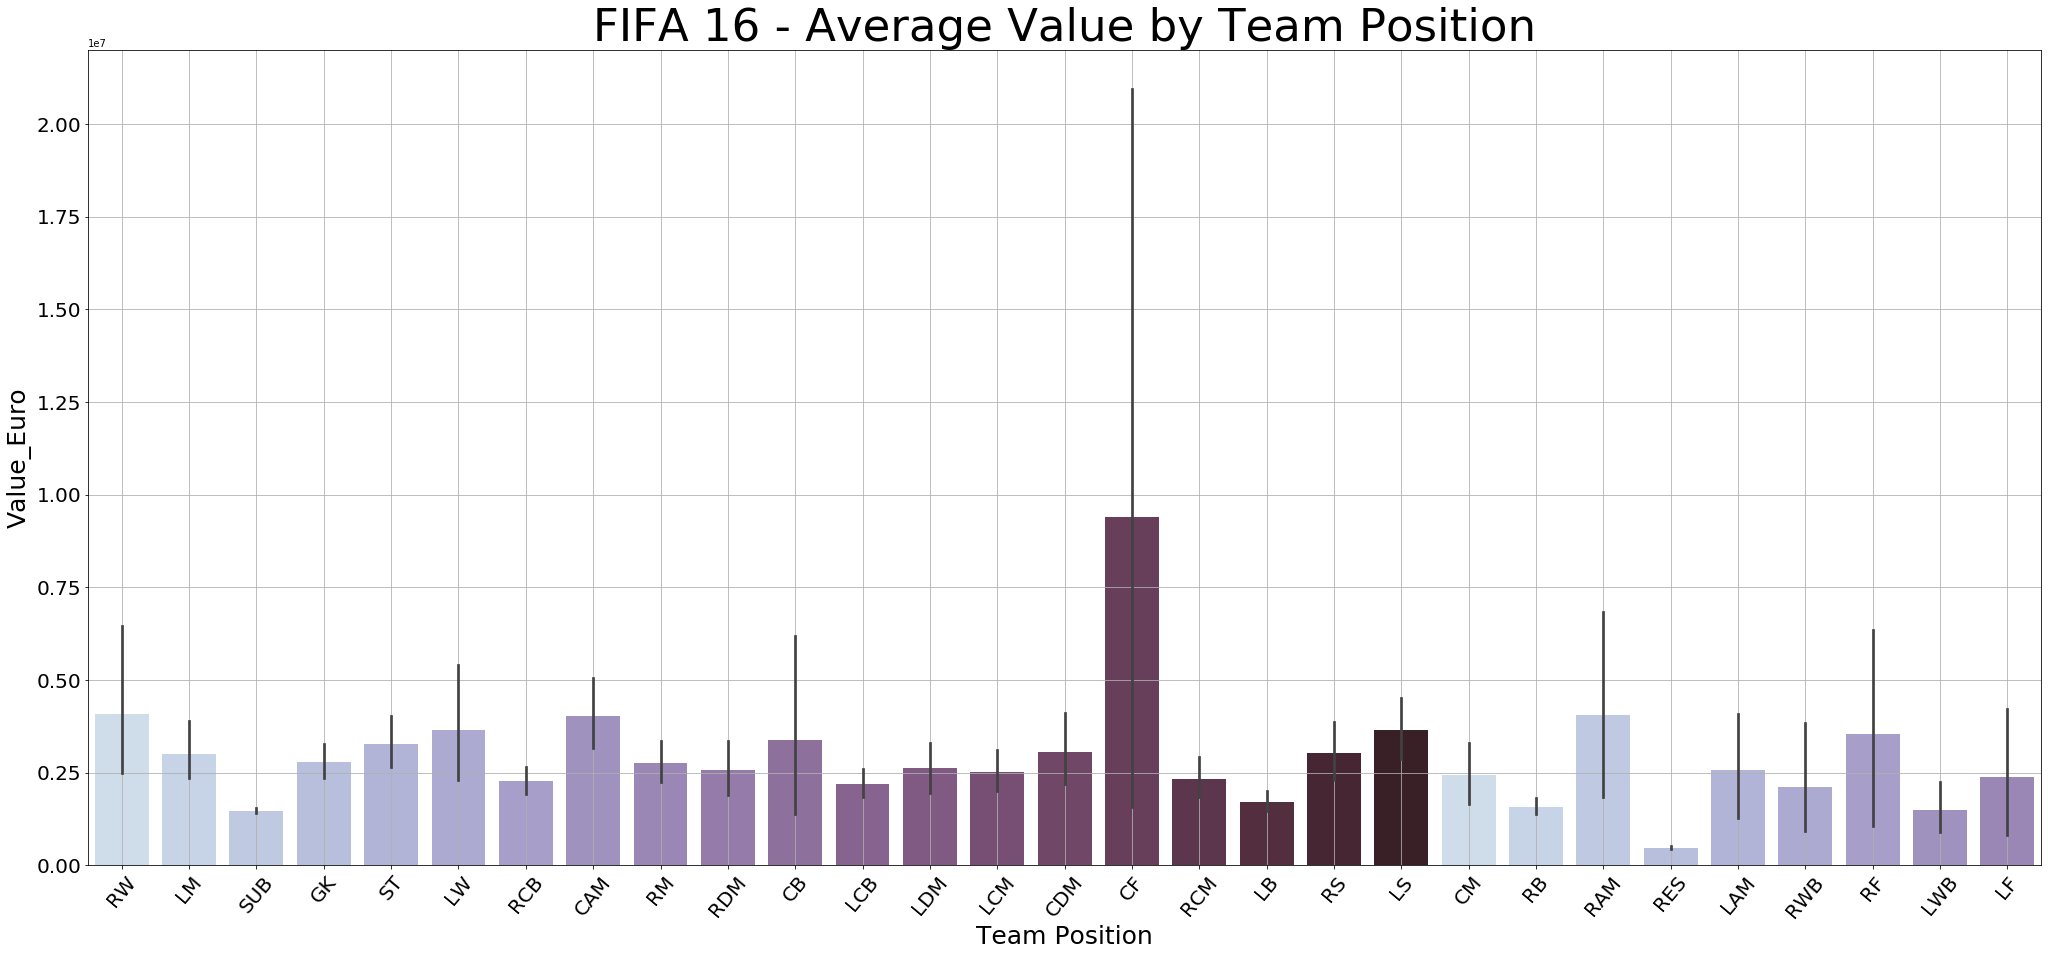

In [21]:
plt.figure(figsize=(35,15))
sns.barplot(x=list(df20['team_position']),y=df20["value_eur"],palette=sns.cubehelix_palette(20, start=4, rot=-.5))
plt.xticks(rotation=50,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Team Position",fontsize=25)
plt.ylabel("Value_Euro",fontsize=25,rotation=90)
plt.title("FIFA 20 - Average Value by Team Position",fontsize=45)
plt.grid(True)

plt.figure(figsize=(35,15))
sns.barplot(x=list(df19['team_position']),y=df19["value_eur"],palette=sns.cubehelix_palette(20, start=4, rot=-.5))
plt.xticks(rotation=50,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Team Position",fontsize=25)
plt.ylabel("Value_Euro",fontsize=25,rotation=90)
plt.title("FIFA 19 - Average Value by Team Position",fontsize=45)
plt.grid(True)

plt.figure(figsize=(35,15))
sns.barplot(x=list(df18['team_position']),y=df18["value_eur"],palette=sns.cubehelix_palette(20, start=4, rot=-.5))
plt.xticks(rotation=50,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Team Position",fontsize=25)
plt.ylabel("Value_Euro",fontsize=25,rotation=90)
plt.title("FIFA 18 - Average Value by Team Position",fontsize=45)
plt.grid(True)

plt.figure(figsize=(35,15))
sns.barplot(x=list(df17['team_position']),y=df17["value_eur"],palette=sns.cubehelix_palette(20, start=4, rot=-.5))
plt.xticks(rotation=50,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Team Position",fontsize=25)
plt.ylabel("Value_Euro",fontsize=25,rotation=90)
plt.title("FIFA 17 - Average Value by Team Position",fontsize=45)
plt.grid(True)

plt.figure(figsize=(35,15))
sns.barplot(x=list(df16['team_position']),y=df16["value_eur"],palette=sns.cubehelix_palette(20, start=4, rot=-.5))
plt.xticks(rotation=50,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Team Position",fontsize=25)
plt.ylabel("Value_Euro",fontsize=25,rotation=90)
plt.title("FIFA 16 - Average Value by Team Position",fontsize=45)
plt.grid(True)

#### Comparing the average value by team position between FIFA 2016 through 2020 using boxplot

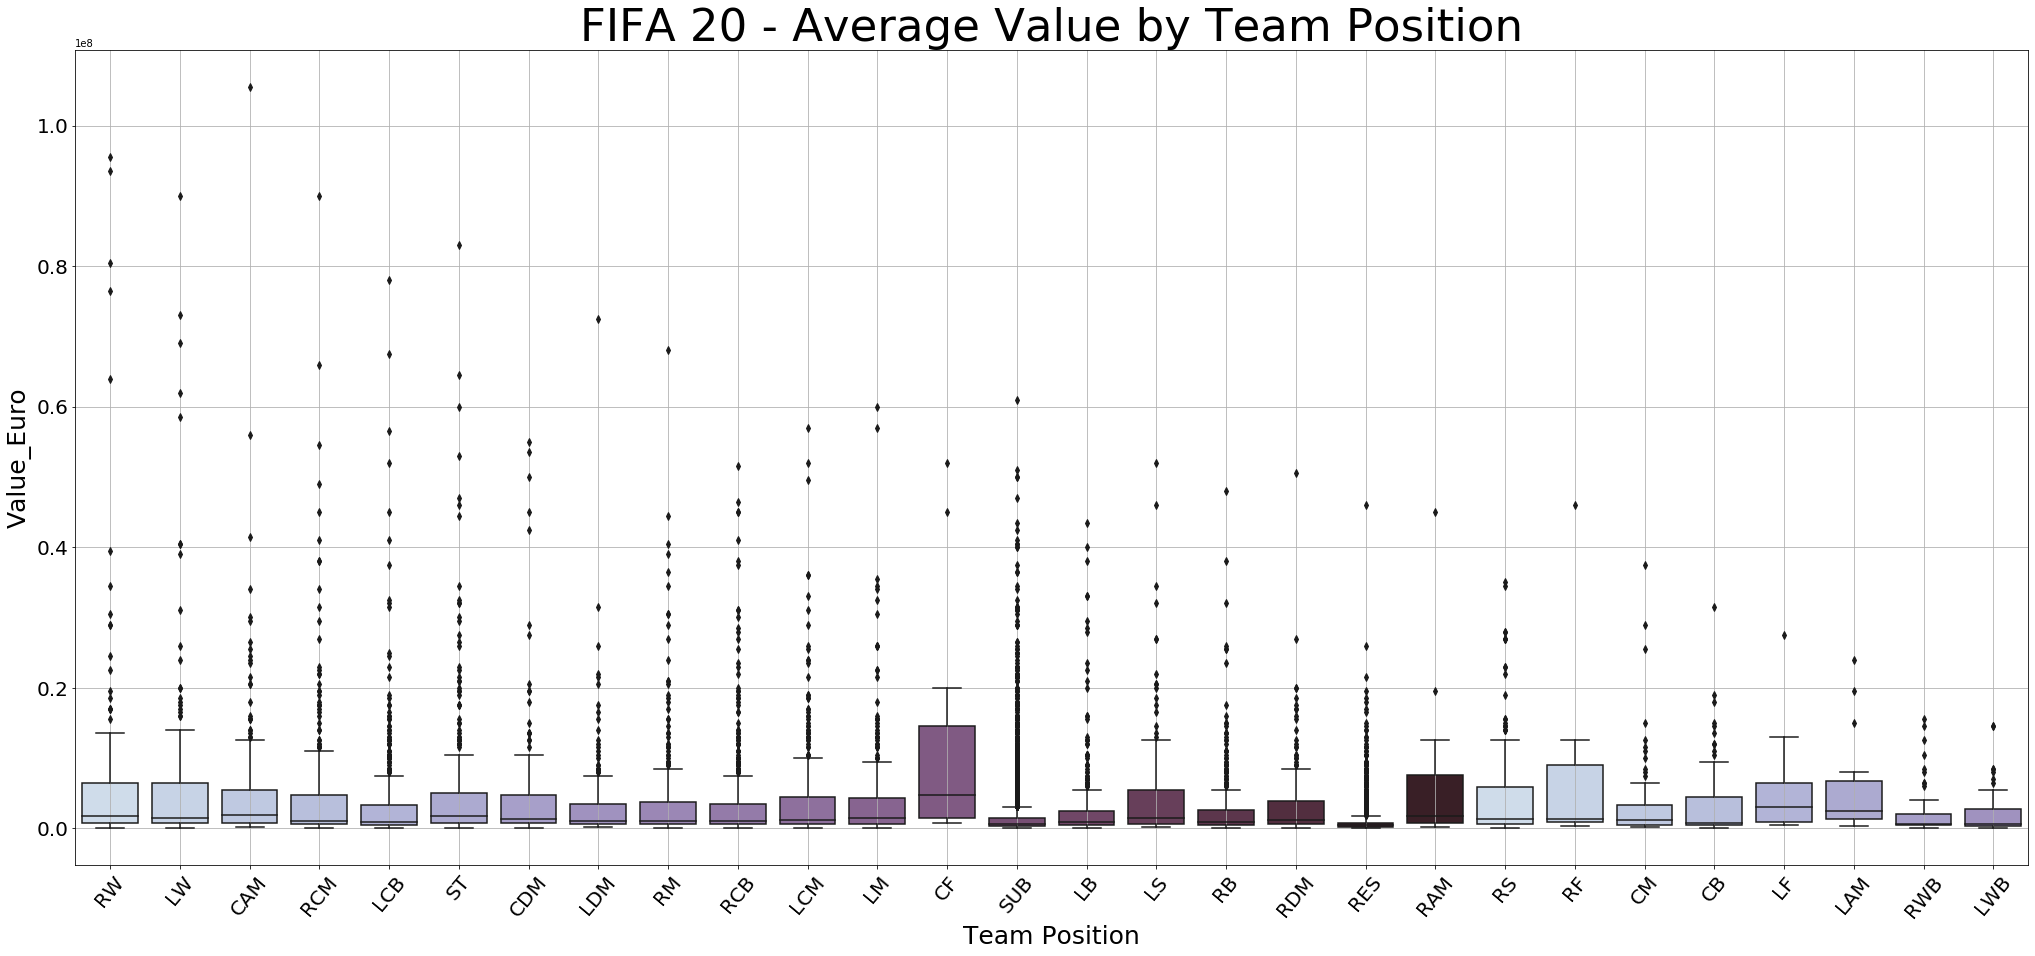

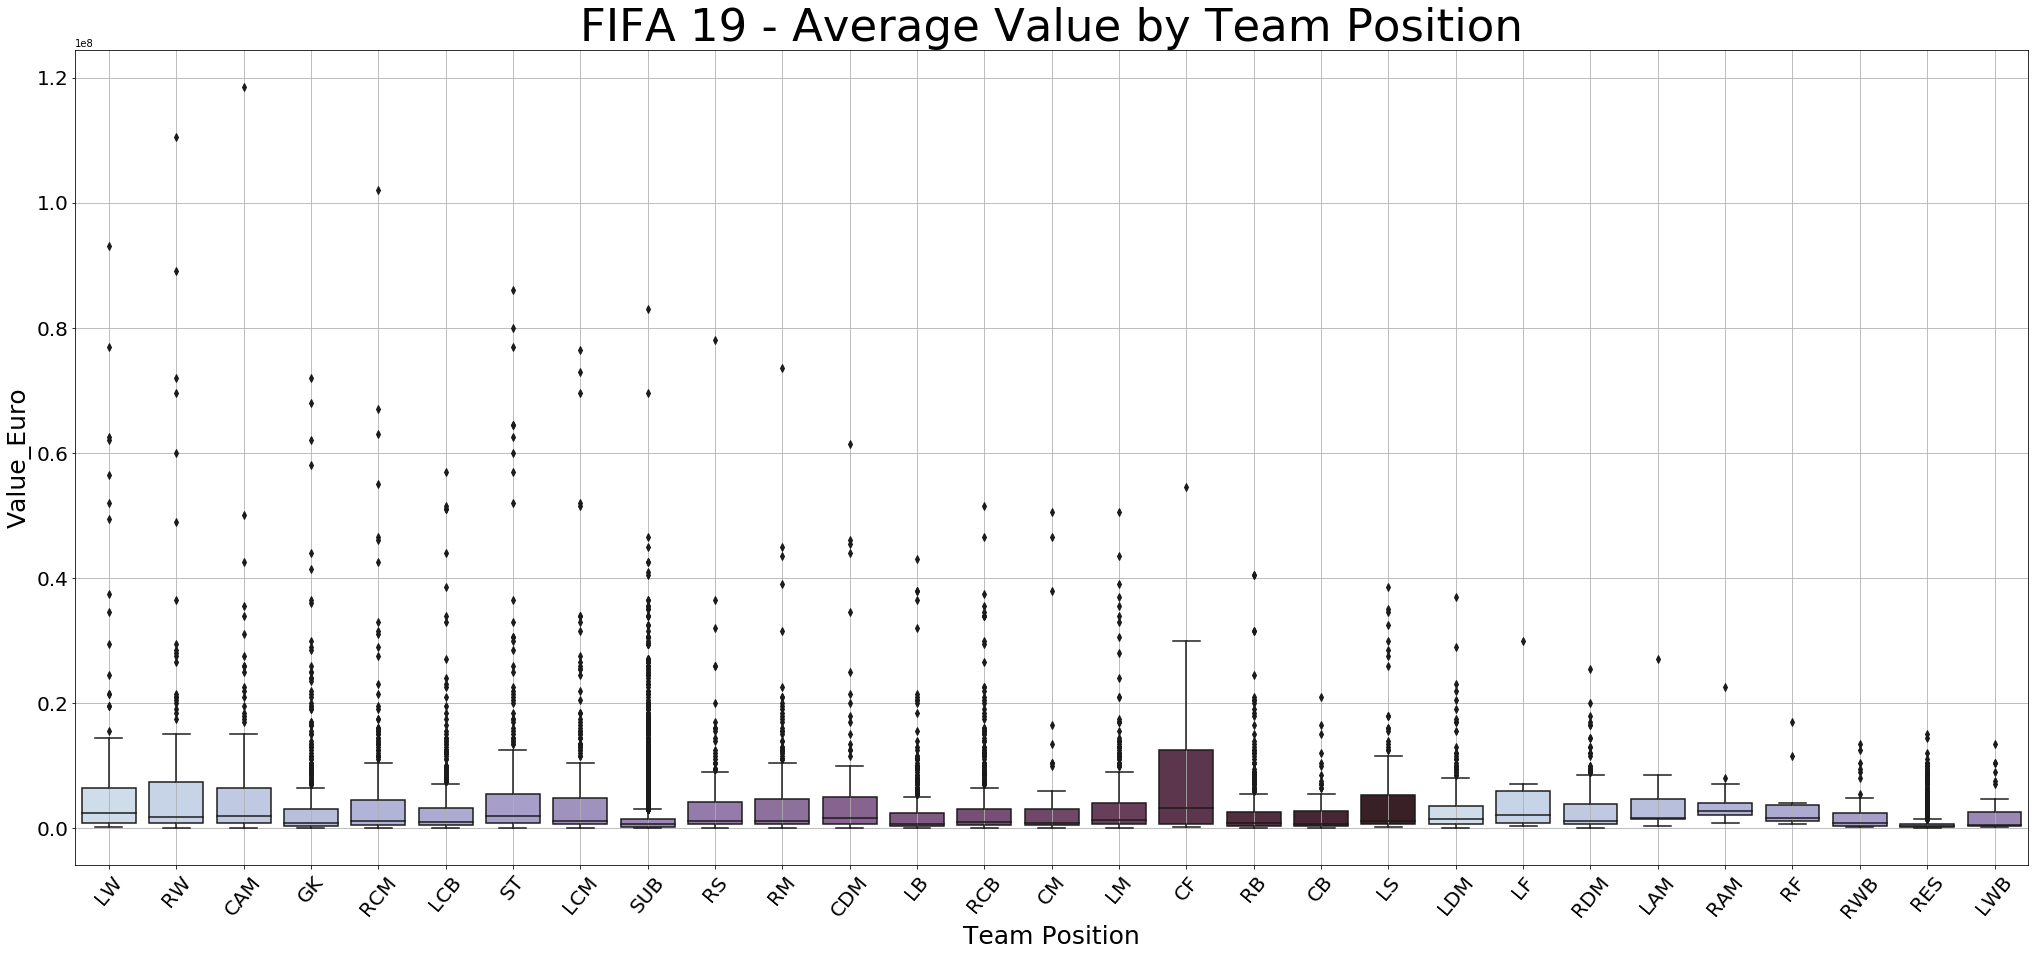

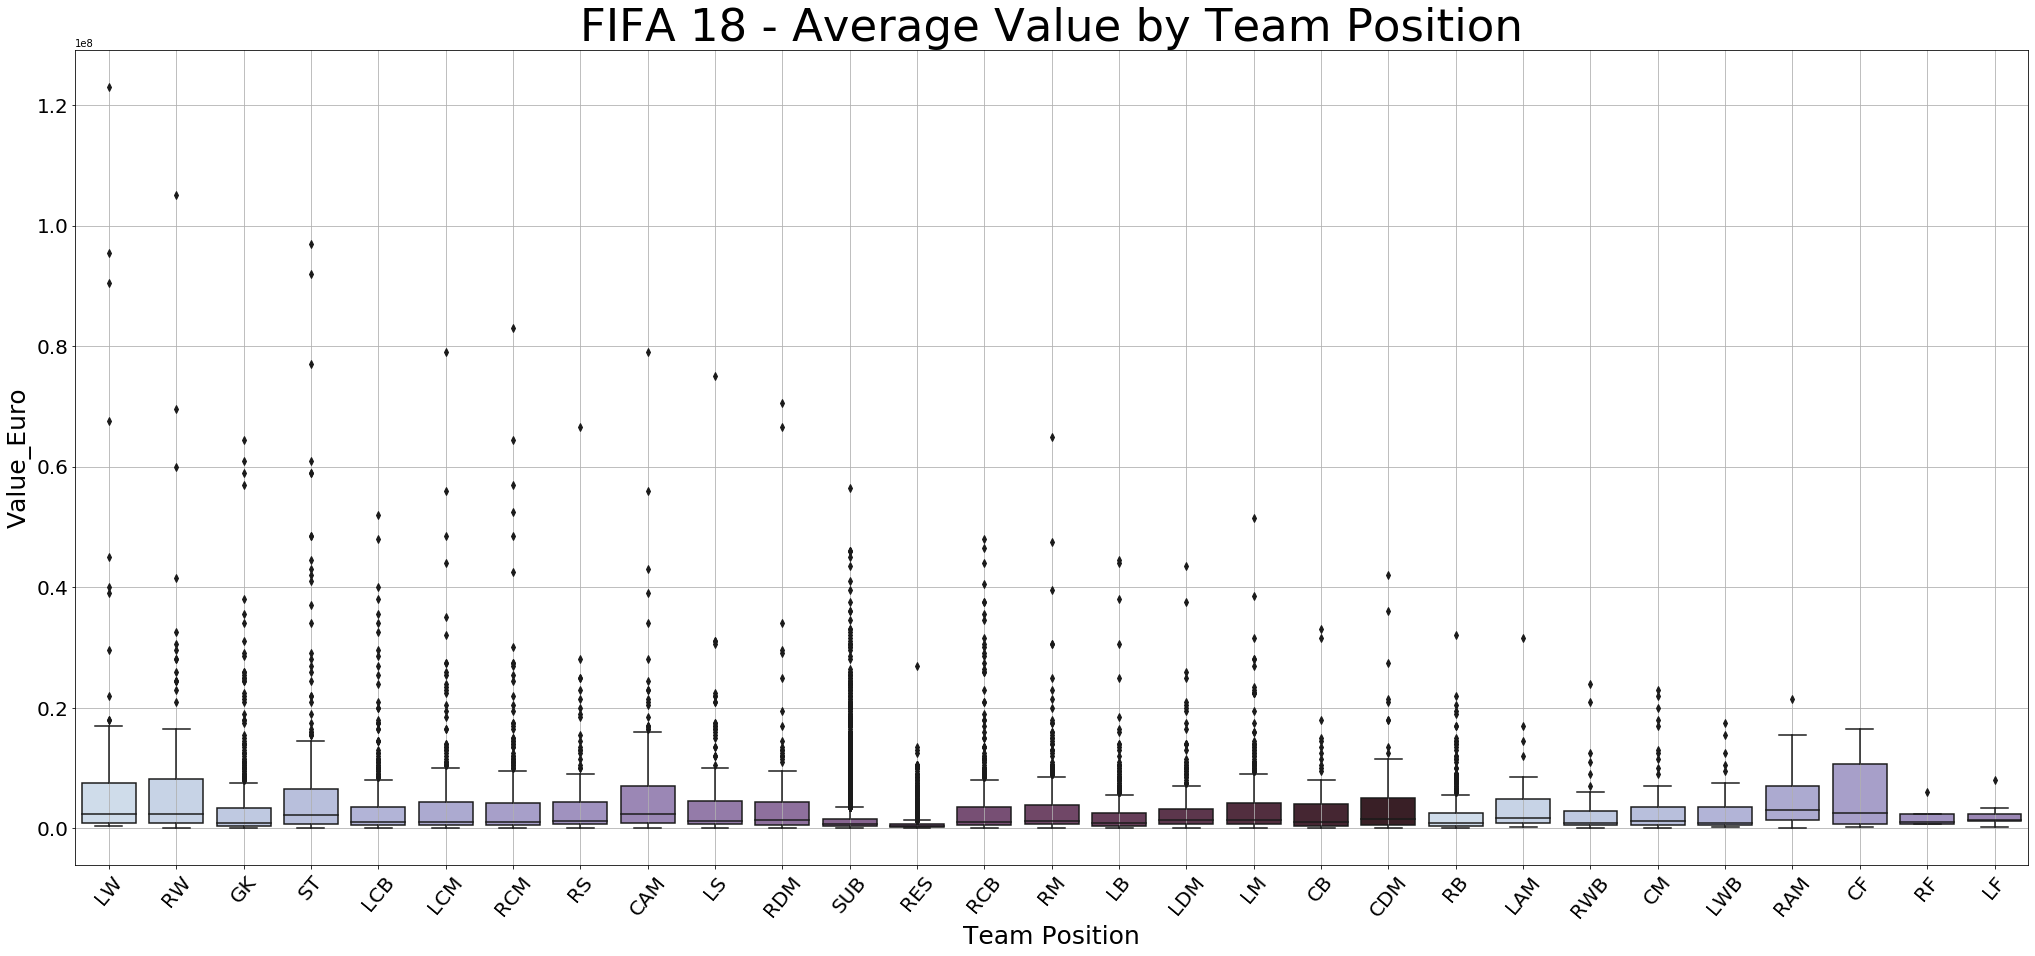

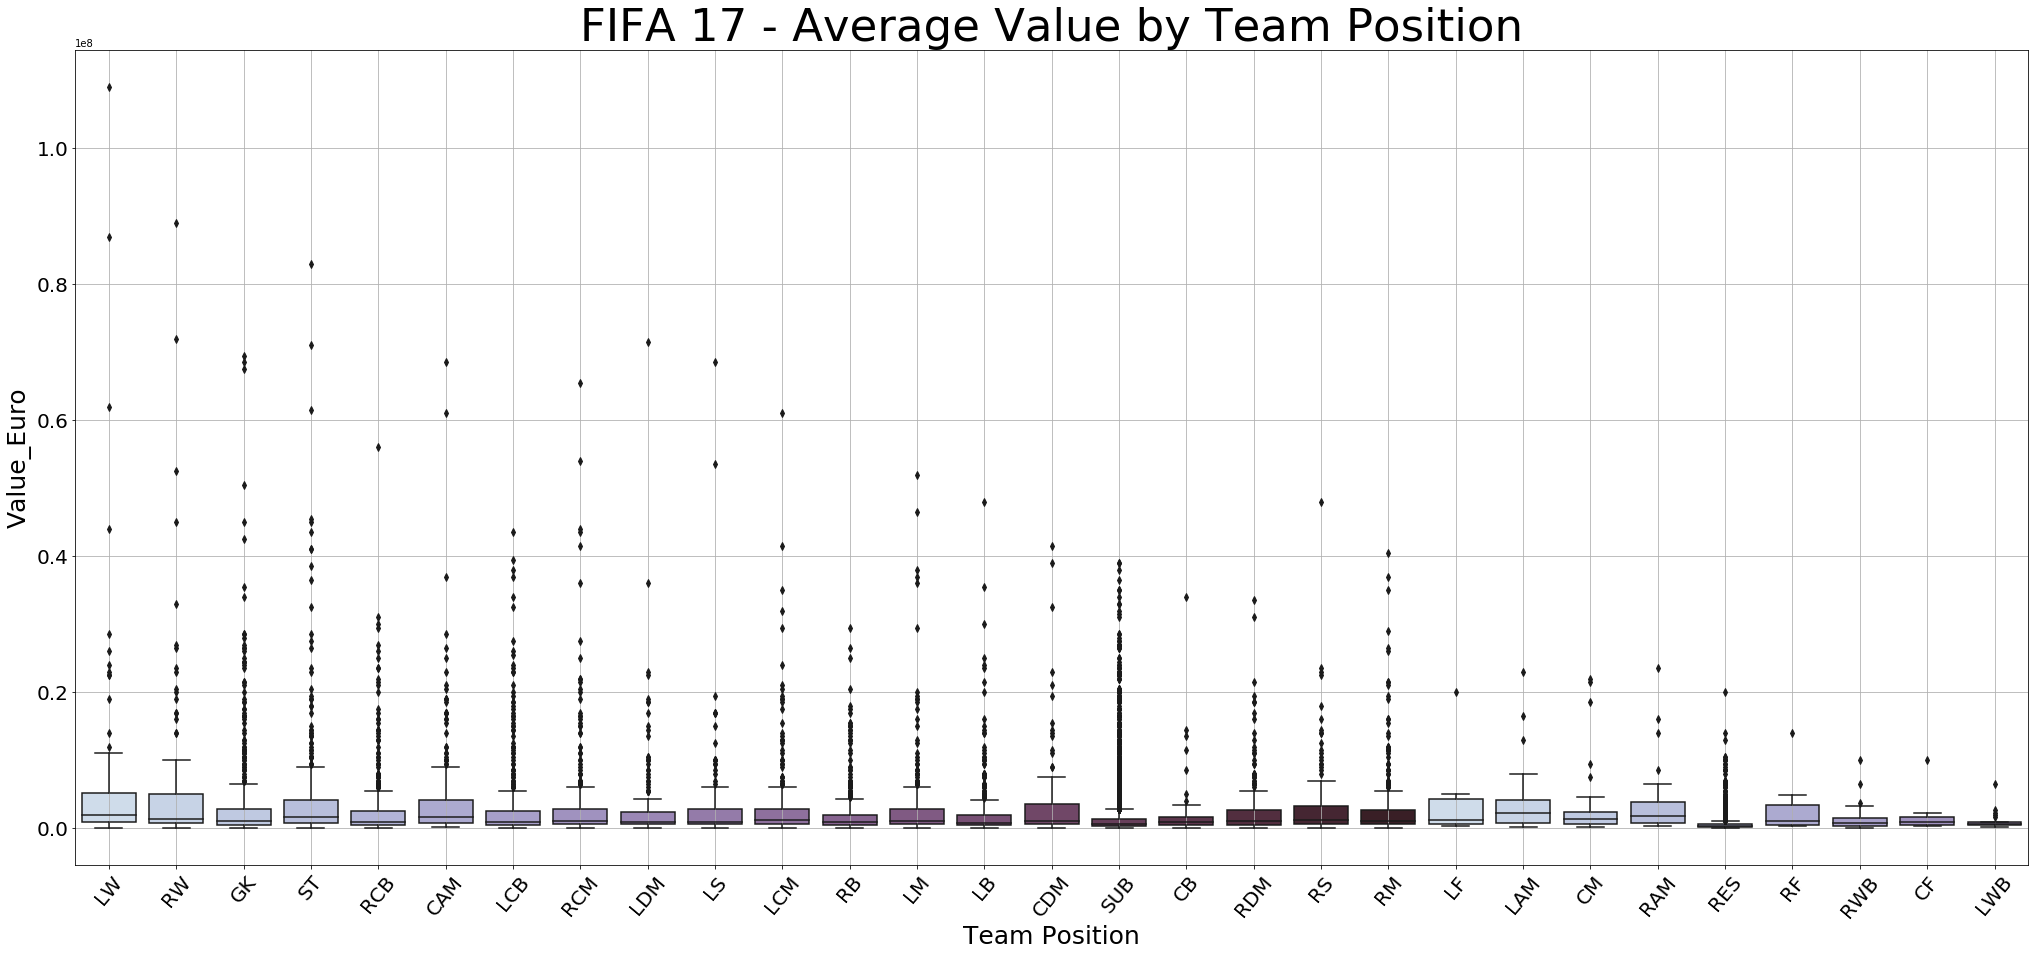

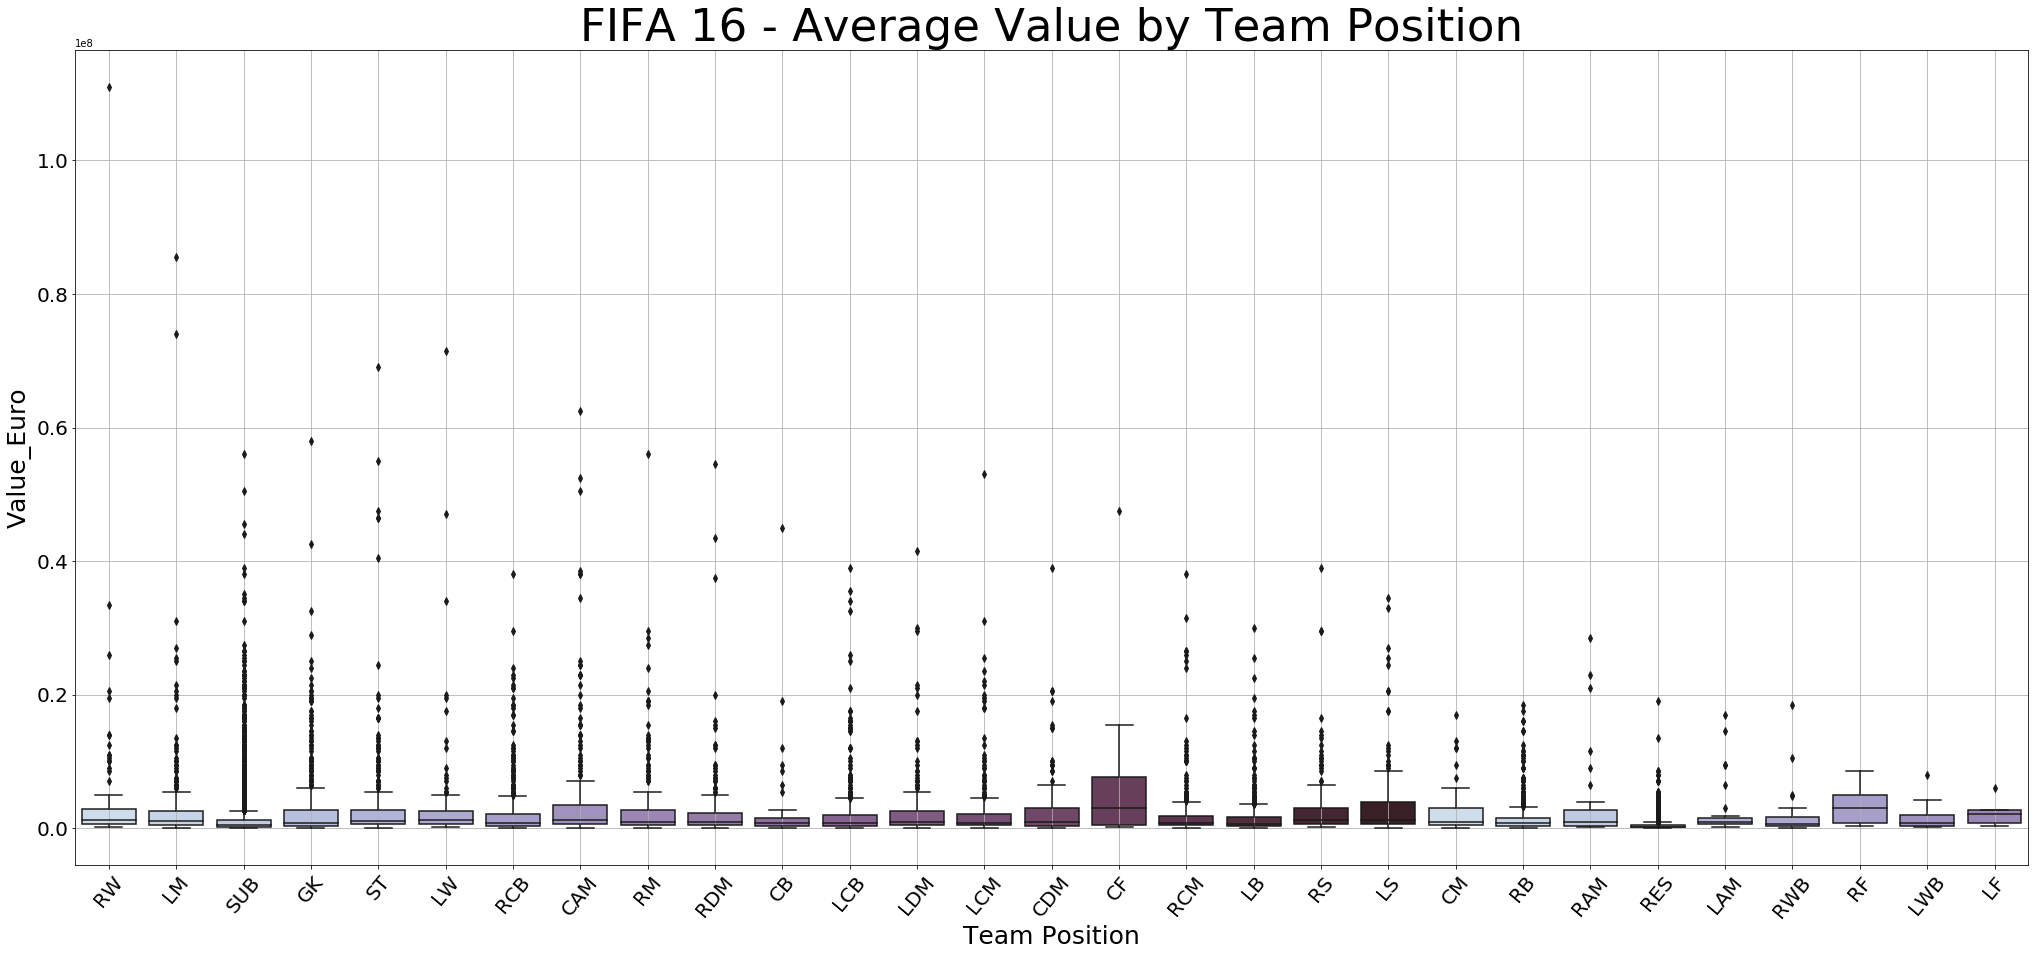

In [22]:
plt.figure(figsize=(35,15))
sns.boxplot(x=list(df20['team_position']),y=df20["value_eur"],palette=sns.cubehelix_palette(20, start=4, rot=-.5))
plt.xticks(rotation=50,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Team Position",fontsize=25)
plt.ylabel("Value_Euro",fontsize=25,rotation=90)
plt.title("FIFA 20 - Average Value by Team Position",fontsize=45)
plt.grid(True)

plt.figure(figsize=(35,15))
sns.boxplot(x=list(df19['team_position']),y=df19["value_eur"],palette=sns.cubehelix_palette(20, start=4, rot=-.5))
plt.xticks(rotation=50,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Team Position",fontsize=25)
plt.ylabel("Value_Euro",fontsize=25,rotation=90)
plt.title("FIFA 19 - Average Value by Team Position",fontsize=45)
plt.grid(True)

plt.figure(figsize=(35,15))
sns.boxplot(x=list(df18['team_position']),y=df18["value_eur"],palette=sns.cubehelix_palette(20, start=4, rot=-.5))
plt.xticks(rotation=50,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Team Position",fontsize=25)
plt.ylabel("Value_Euro",fontsize=25,rotation=90)
plt.title("FIFA 18 - Average Value by Team Position",fontsize=45)
plt.grid(True)

plt.figure(figsize=(35,15))
sns.boxplot(x=list(df17['team_position']),y=df17["value_eur"],palette=sns.cubehelix_palette(20, start=4, rot=-.5))
plt.xticks(rotation=50,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Team Position",fontsize=25)
plt.ylabel("Value_Euro",fontsize=25,rotation=90)
plt.title("FIFA 17 - Average Value by Team Position",fontsize=45)
plt.grid(True)

plt.figure(figsize=(35,15))
sns.boxplot(x=list(df16['team_position']),y=df16["value_eur"],palette=sns.cubehelix_palette(20, start=4, rot=-.5))
plt.xticks(rotation=50,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Team Position",fontsize=25)
plt.ylabel("Value_Euro",fontsize=25,rotation=90)
plt.title("FIFA 16 - Average Value by Team Position",fontsize=45)
plt.grid(True)

#### Creating scatterplots to see how our stronger predictors correlate to our target

In [23]:
df20.corr()['value_eur'].sort_values()

sofifa_id                    -0.173779
Medium/Medium                -0.142906
team_jersey_number           -0.084416
Low/Medium                   -0.034745
Low/Low                      -0.016947
Low/High                     -0.016185
preferred_foot               -0.005359
Medium/Low                   -0.002130
goalkeeping_reflexes          0.003304
goalkeeping_positioning       0.005041
goalkeeping_diving            0.006398
goalkeeping_handling          0.009921
goalkeeping_kicking           0.016914
height_cm                     0.026893
High/Low                      0.032553
Medium/High                   0.043075
weight_kg                     0.068437
High/Medium                   0.080833
age                           0.089773
defending_sliding_tackle      0.096258
movement_balance              0.108361
power_jumping                 0.113047
High/High                     0.120693
defending_standing_tackle     0.124991
power_strength                0.136281
mentality_interceptions  

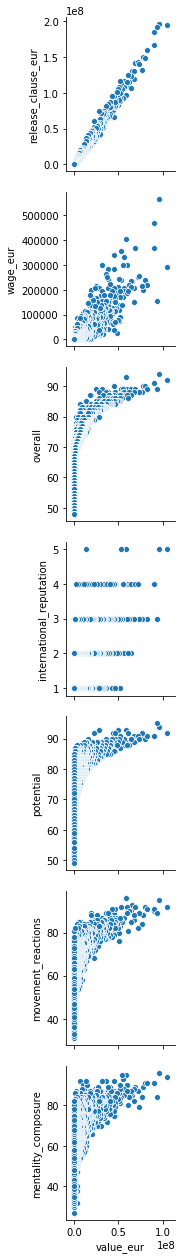

In [24]:
sns.pairplot(df20, y_vars=['release_clause_eur', 'wage_eur', 'overall', 'international_reputation', 'potential',
                          'movement_reactions', 'mentality_composure'], x_vars=['value_eur'])

#### Comparing our strongest predictors to the target

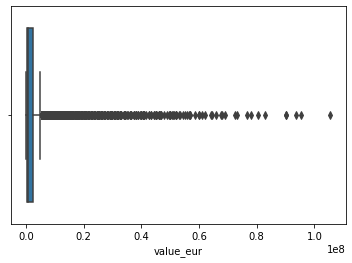

In [25]:
sns.boxplot(df20['value_eur']);

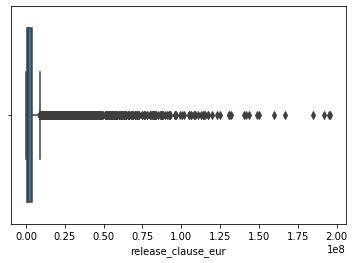

In [26]:
sns.boxplot(df20['release_clause_eur']);

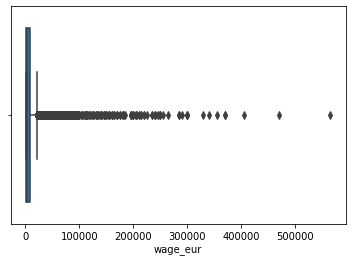

In [27]:
sns.boxplot(df20['wage_eur']);

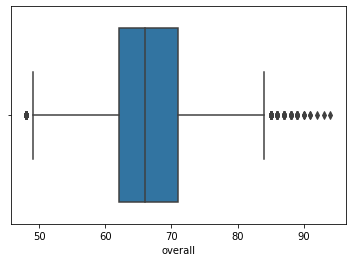

In [28]:
sns.boxplot(df20['overall']);

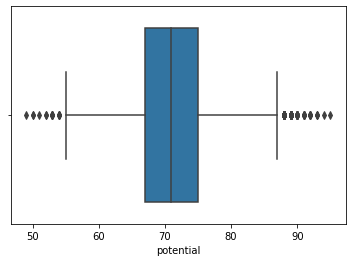

In [29]:
sns.boxplot(df20['potential']);

## Model Prep

#### Create our X and y

In [41]:
X = df20.drop(columns=['player_url', 'short_name', 'long_name', 'dob', 'nationality', 'club', 'value_eur',
                       'player_positions', 'preferred_foot', 'work_rate', 'body_type', 'real_face',
                        'team_position', 'joined', 'goalkeeping_reflexes', 'goalkeeping_positioning',
                      'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'release_clause_eur'])

In [42]:
y = df20['value_eur']

#### Train/test split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#### PowerTransformer

In [44]:
pt = PowerTransformer()
pt.fit(X_train)
X_train = pt.transform(X_train)
X_test = pt.transform(X_test)

In [45]:
pt_y = PowerTransformer()
pt_y.fit(y_train.to_frame()) 
y_train_pt = pt_y.transform(y_train.to_frame())
y_test_pt = pt_y.transform(y_test.to_frame())

#### Instantiate Models

In [46]:
linear_reg = LinearRegression()

knn_reg = KNeighborsRegressor()

cart_reg = DecisionTreeRegressor()

bagged_reg = BaggingRegressor()

random_forest_reg = RandomForestRegressor()

adaboost_reg = AdaBoostRegressor()

#### Fitting Models 

In [47]:
linear_reg.fit(X_train, y_train_pt)

knn_reg.fit(X_train, y_train_pt)

cart_reg.fit(X_train, y_train_pt)

bagged_reg.fit(X_train, y_train_pt)

random_forest_reg.fit(X_train, y_train_pt)

adaboost_reg.fit(X_train, y_train_pt)

/Users/naoufal/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/ensemble/bagging.py:398: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/Users/naoufal/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/naoufal/anaconda3/envs/dsi/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/naoufal/anaconda3/envs/dsi/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

#### Models Evaluation

In [48]:
print(f'Linear Regression Train Score: {linear_reg.score(X_train, y_train_pt)}')
print(f'Linear Regression Test Score: {linear_reg.score(X_test, y_test_pt)}')

print(f'KNeighbors Regressor Train Score: {knn_reg.score(X_train, y_train_pt)}')
print(f'KNeighbors Regressor Test Score: {knn_reg.score(X_test, y_test)}')

print(f'Decision Tree Regressor Train Score: {cart_reg.score(X_train, y_train_pt)}')
print(f'Decision Tree Regressor Test Score: {cart_reg.score(X_test, y_test)}')

print(f'Bagging Regressor Train Score: {bagged_reg.score(X_train, y_train_pt)}')
print(f'Bagging Regressor Test Score: {bagged_reg.score(X_test, y_test_pt)}')

print(f'Random Forest Regressor Train Score: {random_forest_reg.score(X_train, y_train_pt)}')
print(f'Random Forest Regressor Test Score: {random_forest_reg.score(X_test, y_test_pt)}')

print(f'AdaBoost Regressor Train Score: {adaboost_reg.score(X_train, y_train_pt)}')
print(f'AdaBoost Regressor Test Score: {adaboost_reg.score(X_test, y_test_pt)}')

Linear Regression Train Score: 0.9753777445251908
Linear Regression Test Score: 0.9755841665427952
KNeighbors Regressor Train Score: 0.9470084407389043
KNeighbors Regressor Test Score: -0.20890176133306435
Decision Tree Regressor Train Score: 1.0
Decision Tree Regressor Test Score: -0.2089017379040572
Bagging Regressor Train Score: 0.9995367932257324
Bagging Regressor Test Score: 0.9968870245454277
Random Forest Regressor Train Score: 0.9995428540676142
Random Forest Regressor Test Score: 0.9968096362798413
AdaBoost Regressor Train Score: 0.9512084916670529
AdaBoost Regressor Test Score: 0.9489757909070001


In [49]:
pred = random_forest_reg.predict(X_test)

In [50]:
pred_reversed = pt_y.inverse_transform(pred.reshape(-1,1))

In [51]:
r2_score(y_test, pred_reversed)

0.9782309503316546